# 方差过滤

In [1]:
#1.导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# 2.导入数据集，探索数据
data = pd.read_csv(r"C:\Users\ASUS\Desktop\EEG\feature_analysis\ours\S7\s7_16.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean_0  1325 non-null   float64
 1   mean_1  1325 non-null   float64
 2   mean_2  1325 non-null   float64
 3   mean_3  1325 non-null   float64
 4   std_0   1325 non-null   float64
 5   std_1   1325 non-null   float64
 6   std_2   1325 non-null   float64
 7   std_3   1325 non-null   float64
 8   max_0   1325 non-null   float64
 9   max_1   1325 non-null   float64
 10  max_2   1325 non-null   float64
 11  max_3   1325 non-null   float64
 12  min_0   1325 non-null   float64
 13  min_1   1325 non-null   float64
 14  min_2   1325 non-null   float64
 15  min_3   1325 non-null   float64
 16  Label   1325 non-null   float64
dtypes: float64(17)
memory usage: 176.1 KB


In [3]:
data.shape

(1325, 17)

In [4]:
data.head()

mean_0  mean_1  mean_2   mean_3  std_0  std_1  std_2  std_3  max_0  max_1  \
0  0.1530  -0.137  0.1670 -0.03840   18.2   12.4   11.0   8.41   44.8   32.4   
1 -0.7460   0.144 -0.1160  0.05970   43.8   16.6   13.5   7.09  105.0   39.6   
2 -4.7200   0.935 -0.5150 -0.00777  122.0   73.8   56.3  41.60  268.0  172.0   
3  0.0127   0.154 -0.0551  0.01070   12.6   13.9   10.8   8.32   30.9   36.7   
4  1.6400   1.160 -0.1070 -0.08370   57.0   52.9   18.5  25.30  141.0  203.0   

   max_2  max_3  min_0  min_1  min_2  min_3  Label  
0   34.0   17.2  -43.3  -31.2  -26.0  -17.8    2.0  
1   40.5   14.8 -127.0  -39.9  -38.2  -14.8    0.0  
2  122.0  113.0 -234.0 -175.0 -125.0 -111.0    0.0  
3   27.2   35.2  -33.5  -34.4  -26.4  -28.2    2.0  
4   60.0   81.4 -138.0 -171.0  -54.0 -101.0    0.0

In [5]:
data.describe()

mean_0       mean_1       mean_2       mean_3        std_0  \
count  1325.000000  1325.000000  1325.000000  1325.000000  1325.000000   
mean      0.012854    -0.004540     0.000779     0.000540    42.983457   
std       1.172551     0.370256     0.180058     0.086906    46.920021   
min      -4.930000    -2.370000    -0.799000    -0.804000     8.570000   
25%      -0.366000    -0.134000    -0.077200    -0.031000    15.400000   
50%       0.004460     0.003570     0.003030     0.000093    25.500000   
75%       0.352000     0.135000     0.079900     0.029700    48.400000   
max       7.820000     1.840000     0.876000     0.760000   373.000000   

             std_1        std_2        std_3        max_0        max_1  \
count  1325.000000  1325.000000  1325.000000  1325.000000  1325.000000   
mean     23.254234    16.096679    13.052242   114.894868    64.805434   
std      22.442636    12.803562    10.027697   125.912721    64.606744   
min       6.620000     4.890000     3.440000    19.000000    16.100000   
25%      11.500000     9.360000     7.760000    38.900000    28.900000   
50%      14.300000    11.400000     9.590000    67.200000    37.400000   
75%      24.700000    16.500000    13.800000   137.000000    73.800000   
max     158.000000    96.600000    80.600000  1040.000000   448.000000   

             max_2        max_3        min_0        min_1        min_2  \
count  1325.000000  1325.000000  1325.000000  1325.000000  1325.000000   
mean     46.059925    38.331321  -116.444000   -64.639623   -45.579019   
std      39.733618    32.731415   132.596571    63.814858    38.745351   
min      11.600000    10.400000 -1260.000000  -447.000000  -319.000000   
25%      24.300000    19.900000  -135.000000   -74.000000   -47.600000   
50%      31.500000    26.300000   -64.100000   -37.400000   -30.800000   
75%      47.500000    42.000000   -38.800000   -28.600000   -24.400000   
max     340.000000   272.000000   -17.600000   -15.500000   -12.100000   

             min_3        Label  
count  1325.000000  1325.000000  
mean    -38.156151     0.963774  
std      32.301633     0.849854  
min    -258.000000     0.000000  
25%     -42.000000     0.000000  
50%     -26.300000     1.000000  
75%     -19.900000     2.000000  
max     -10.100000     2.000000

In [6]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1]#要输入的是标签，不是特征矩阵，所以允许一维

In [7]:
le = LabelEncoder()  # 实例化
le = le.fit(y) # 导入数据
label = le.transform(y) # transform接口调取数据
le.classes_  #属性.classes_查看标签中究竟有多少类别
label

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
le.fit_transform(y)  #也可以直接fit_transform一步到位

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
le.inverse_transform(label)  #使用inverse_transform可以逆转

array([2., 0., 0., ..., 0., 0., 0.])

In [10]:
data.iloc[:,-1] = label  #让标签等于我们运行出来的结果
data.head()


mean_0  mean_1  mean_2   mean_3  std_0  std_1  std_2  std_3  max_0  max_1  \
0  0.1530  -0.137  0.1670 -0.03840   18.2   12.4   11.0   8.41   44.8   32.4   
1 -0.7460   0.144 -0.1160  0.05970   43.8   16.6   13.5   7.09  105.0   39.6   
2 -4.7200   0.935 -0.5150 -0.00777  122.0   73.8   56.3  41.60  268.0  172.0   
3  0.0127   0.154 -0.0551  0.01070   12.6   13.9   10.8   8.32   30.9   36.7   
4  1.6400   1.160 -0.1070 -0.08370   57.0   52.9   18.5  25.30  141.0  203.0   

   max_2  max_3  min_0  min_1  min_2  min_3  Label  
0   34.0   17.2  -43.3  -31.2  -26.0  -17.8      2  
1   40.5   14.8 -127.0  -39.9  -38.2  -14.8      0  
2  122.0  113.0 -234.0 -175.0 -125.0 -111.0      0  
3   27.2   35.2  -33.5  -34.4  -26.4  -28.2      2  
4   60.0   81.4 -138.0 -171.0  -54.0 -101.0      0

In [11]:
print(data.columns)

Index(['mean_0', 'mean_1', 'mean_2', 'mean_3', 'std_0', 'std_1', 'std_2',
       'std_3', 'max_0', 'max_1', 'max_2', 'max_3', 'min_0', 'min_1', 'min_2',
       'min_3', 'Label'],
      dtype='object')


In [12]:
data['Label']

0       2
1       0
2       0
3       2
4       0
       ..
1320    2
1321    1
1322    0
1323    0
1324    0
Name: Label, Length: 1325, dtype: int64

In [13]:
data.shape

(1325, 17)

In [14]:
x = data.iloc[:,0:16]
x.head()

mean_0  mean_1  mean_2   mean_3  std_0  std_1  std_2  std_3  max_0  max_1  \
0  0.1530  -0.137  0.1670 -0.03840   18.2   12.4   11.0   8.41   44.8   32.4   
1 -0.7460   0.144 -0.1160  0.05970   43.8   16.6   13.5   7.09  105.0   39.6   
2 -4.7200   0.935 -0.5150 -0.00777  122.0   73.8   56.3  41.60  268.0  172.0   
3  0.0127   0.154 -0.0551  0.01070   12.6   13.9   10.8   8.32   30.9   36.7   
4  1.6400   1.160 -0.1070 -0.08370   57.0   52.9   18.5  25.30  141.0  203.0   

   max_2  max_3  min_0  min_1  min_2  min_3  
0   34.0   17.2  -43.3  -31.2  -26.0  -17.8  
1   40.5   14.8 -127.0  -39.9  -38.2  -14.8  
2  122.0  113.0 -234.0 -175.0 -125.0 -111.0  
3   27.2   35.2  -33.5  -34.4  -26.4  -28.2  
4   60.0   81.4 -138.0 -171.0  -54.0 -101.0

In [15]:
x.describe()

mean_0       mean_1       mean_2       mean_3        std_0  \
count  1325.000000  1325.000000  1325.000000  1325.000000  1325.000000   
mean      0.012854    -0.004540     0.000779     0.000540    42.983457   
std       1.172551     0.370256     0.180058     0.086906    46.920021   
min      -4.930000    -2.370000    -0.799000    -0.804000     8.570000   
25%      -0.366000    -0.134000    -0.077200    -0.031000    15.400000   
50%       0.004460     0.003570     0.003030     0.000093    25.500000   
75%       0.352000     0.135000     0.079900     0.029700    48.400000   
max       7.820000     1.840000     0.876000     0.760000   373.000000   

             std_1        std_2        std_3        max_0        max_1  \
count  1325.000000  1325.000000  1325.000000  1325.000000  1325.000000   
mean     23.254234    16.096679    13.052242   114.894868    64.805434   
std      22.442636    12.803562    10.027697   125.912721    64.606744   
min       6.620000     4.890000     3.440000    19.000000    16.100000   
25%      11.500000     9.360000     7.760000    38.900000    28.900000   
50%      14.300000    11.400000     9.590000    67.200000    37.400000   
75%      24.700000    16.500000    13.800000   137.000000    73.800000   
max     158.000000    96.600000    80.600000  1040.000000   448.000000   

             max_2        max_3        min_0        min_1        min_2  \
count  1325.000000  1325.000000  1325.000000  1325.000000  1325.000000   
mean     46.059925    38.331321  -116.444000   -64.639623   -45.579019   
std      39.733618    32.731415   132.596571    63.814858    38.745351   
min      11.600000    10.400000 -1260.000000  -447.000000  -319.000000   
25%      24.300000    19.900000  -135.000000   -74.000000   -47.600000   
50%      31.500000    26.300000   -64.100000   -37.400000   -30.800000   
75%      47.500000    42.000000   -38.800000   -28.600000   -24.400000   
max     340.000000   272.000000   -17.600000   -15.500000   -12.100000   

             min_3  
count  1325.000000  
mean    -38.156151  
std      32.301633  
min    -258.000000  
25%     -42.000000  
50%     -26.300000  
75%     -19.900000  
max     -10.100000

In [16]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2)
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(1060, 16) (265, 16) (1060,) (265,)


KNeighborsClassifier
****Results****
Accuracy: 78.1132%
Log Loss: 2.870880728810447
SVC
****Results****
Accuracy: 64.1509%
Log Loss: 0.7842207415967933
NuSVC
****Results****
Accuracy: 67.1698%
Log Loss: 0.7482918551444566
RandomForestClassifier
****Results****
Accuracy: 93.2075%
Log Loss: 0.27885342303717164
ExtraTreesClassifier
****Results****
Accuracy: 94.7170%
Log Loss: 0.13043644081017708
LGBMClassifier
****Results****
Accuracy: 92.4528%
Log Loss: 0.23155111606111572
LinearDiscriminantAnalysis
****Results****
Accuracy: 50.1887%
Log Loss: 0.9867594341409367
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 56.6038%
Log Loss: 2.7773831639887647


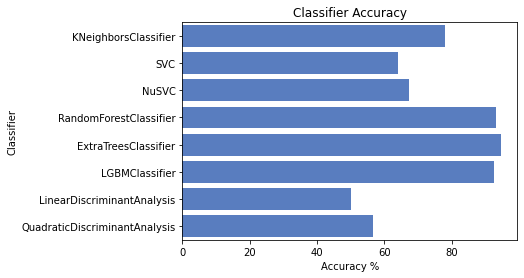

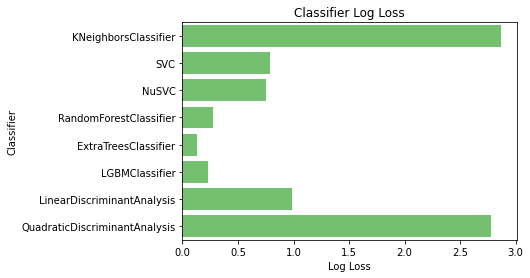

In [17]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier  # k近邻算法
from sklearn.svm import SVC, LinearSVC, NuSVC   #支持向量机分类器、线性支持向量机分类器、核支持向量分类
from sklearn.tree import DecisionTreeClassifier   # 决策树
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier   # 随机森林、极端随机森林、AdaBoost、GradientBoost
from sklearn.naive_bayes import GaussianNB    #朴素贝叶斯GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #线性判别分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   #二次判别分析
import pandas as pd
import lightgbm 
from lightgbm import LGBMClassifier
import seaborn as sns

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="rbf",probability=True),
    NuSVC(probability=True),
#     DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    LGBMClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
    LinearDiscriminantAnalysis(solver='svd'),
    QuadraticDiscriminantAnalysis()]

# 结果可视化
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xtrain, Ytrain)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(Ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(Xtest)
    ll = log_loss(Ytest, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [18]:
import os
from numpy import loadtxt
import xgboost as xgb
from numpy import sort
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
import warnings
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
warnings.filterwarnings("ignore")
# 加载数据集

CV accuracy scores:[0.88679245 0.91509434 0.93396226 0.89622642 0.86792453 0.88679245
 0.85849057 0.85849057 0.93396226 0.93396226]
Accuracy for XGBoost Classifier :  0.8971698113207548
[0.04287804 0.04001294 0.04922714 0.0648894  0.14820874 0.05096171
 0.04680239 0.0431478  0.12817703 0.03955317 0.04637788 0.03516155
 0.1338927  0.03877819 0.04601341 0.04591795]


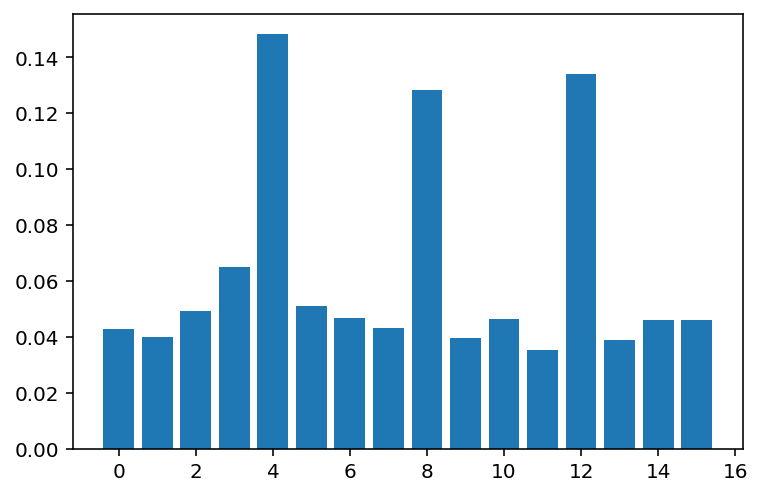

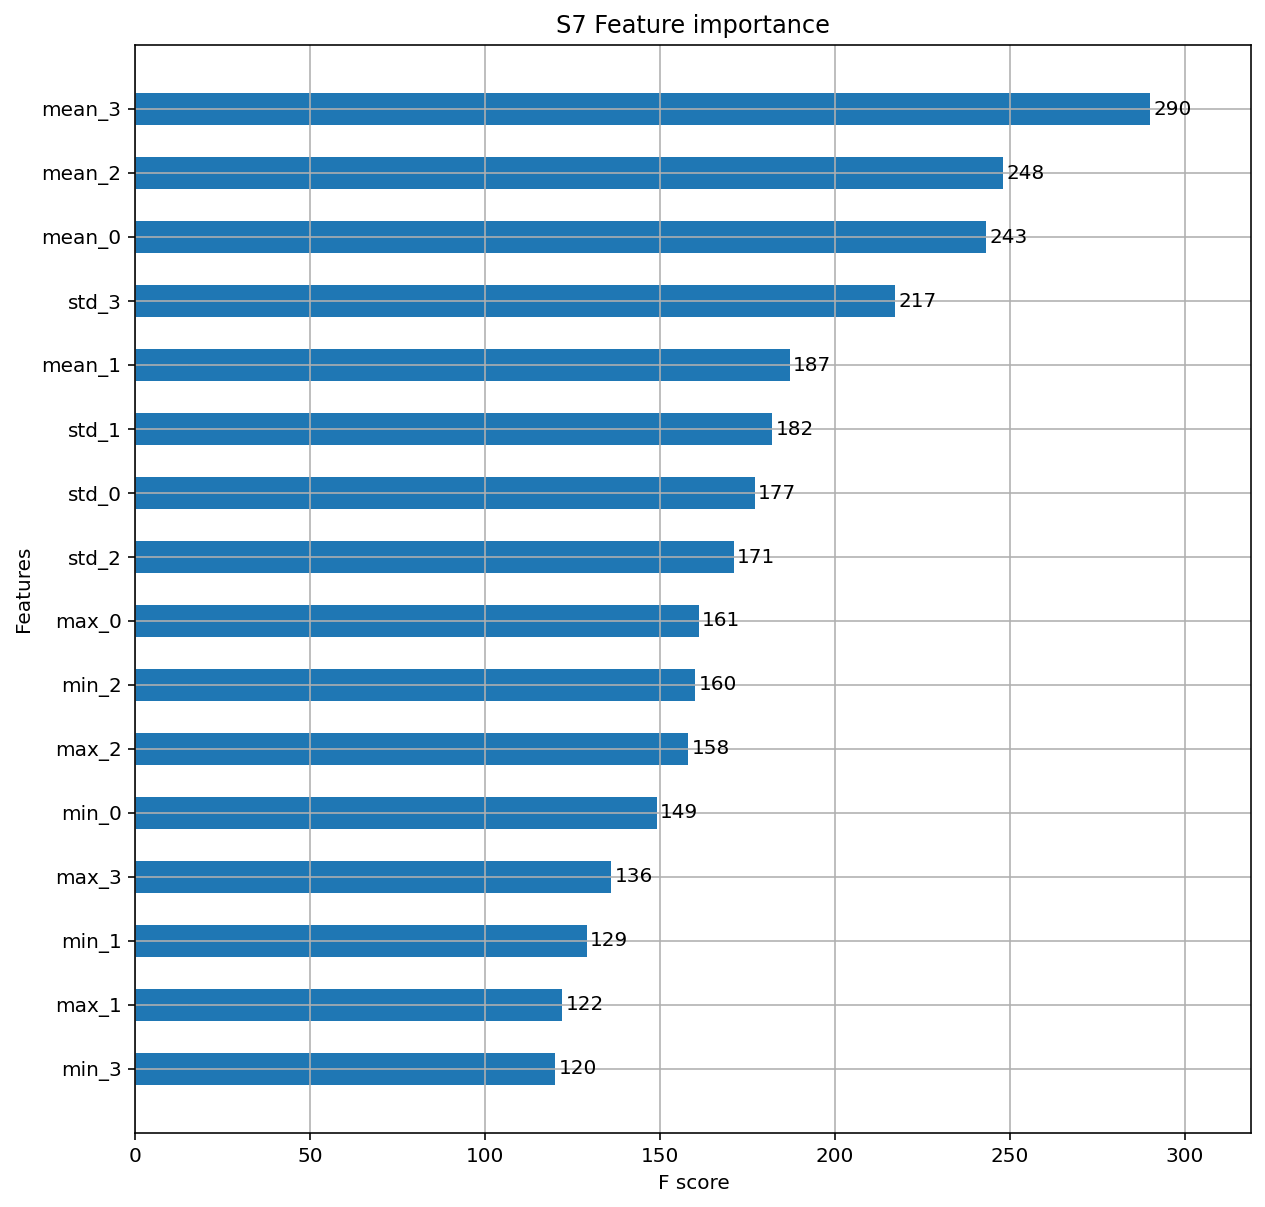

Accuracy: 92.45%
[0.03516155 0.03877819 0.03955317 0.04001294 0.04287804 0.0431478
 0.04591795 0.04601341 0.04637788 0.04680239 0.04922714 0.05096171
 0.0648894  0.12817703 0.1338927  0.14820874]
Thresh=0.035, n=16, Accuracy: 93.21%
Thresh=0.039, n=15, Accuracy: 93.96%
Thresh=0.040, n=14, Accuracy: 93.96%
Thresh=0.040, n=13, Accuracy: 94.72%
Thresh=0.043, n=12, Accuracy: 93.96%
Thresh=0.043, n=11, Accuracy: 93.96%
Thresh=0.046, n=10, Accuracy: 93.21%
Thresh=0.046, n=9, Accuracy: 91.70%
Thresh=0.046, n=8, Accuracy: 92.45%
Thresh=0.047, n=7, Accuracy: 91.70%
Thresh=0.049, n=6, Accuracy: 91.70%
Thresh=0.051, n=5, Accuracy: 90.94%
Thresh=0.065, n=4, Accuracy: 91.70%
Thresh=0.128, n=3, Accuracy: 89.81%
Thresh=0.134, n=2, Accuracy: 88.30%
Thresh=0.148, n=1, Accuracy: 66.04%
[0.9320754716981132, 0.939622641509434, 0.939622641509434, 0.9471698113207547, 0.939622641509434, 0.939622641509434, 0.9320754716981132, 0.9169811320754717, 0.9245283018867925, 0.9169811320754717, 0.9169811320754717, 0.90

In [19]:
          #数据预处理---scale标准化

model=XGBClassifier(objective='multi:softmax',
                                                       n_estimators=150,  # 迭代次数
                                                       learning_rate=0.2,  # 步长
                                                       max_depth=3,  # 树的最大深度
                                                       min_child_weight=1,  # 决定最小叶子节点样本权重和
                                                    
                                                      subsample=0.8,  # 每个决策树所用的子样本占总样本的比例（作用于样本）
                                                       colsample_bytree=0.8, 

                                                     )

#model = XGBClassifier()
model.fit(Xtrain, Ytrain)




scores = cross_val_score(model, Xtrain, Ytrain, cv=10)
print("CV accuracy scores:%s" % scores)
print('Accuracy for XGBoost Classifier : ', scores.mean())
# 变量重要性列表
print(model.feature_importances_)

# 变量重要性可视化

plt.figure(figsize=(6,4), dpi=144)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)


# 变量重要性排序可视化

 
fig,ax = plt.subplots(figsize=(10,10), dpi=144)
plot_importance(model,
                height=0.5,
                ax=ax,
                title='S7 Feature importance',
                max_num_features=64)
plt.show()


# make predictions for test data and evaluate
y_pred = model.predict(Xtest)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


#plot_importance(pl_xgb)
thresholds = sort(model.feature_importances_)
print(thresholds)


acc = []
for thresh in thresholds: # 遍历所有的特征重要性得分，把每个得分作为阈值进行特征选择
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_Xtrain = selection.transform(Xtrain)
# train model
    selection_model = XGBClassifier()
    selection_model.fit(select_Xtrain, Ytrain)
# eval model
    select_Xtest = selection.transform(Xtest)
    y_pred = selection_model.predict(select_Xtest)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Ytest, predictions)
    
   
    acc.append(accuracy)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_Xtrain.shape[1], accuracy*100.0))

print(acc)
    

In [20]:
from sklearn.manifold import TSNE
import time
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123


time_start = time.time()

fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')



t-SNE done! Time elapsed: 2.7576253414154053 seconds


In [21]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

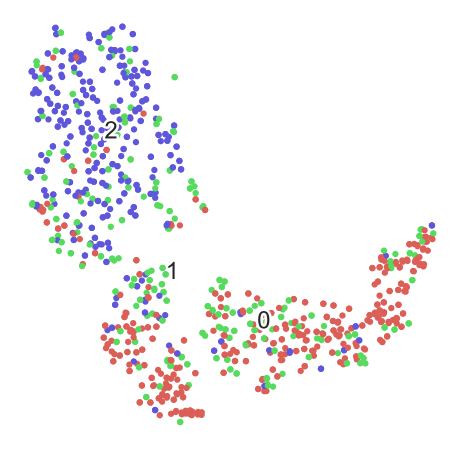

In [22]:
fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

f, ax, sc, txts = fashion_scatter(fashion_tsne, Ytrain)
f.show()

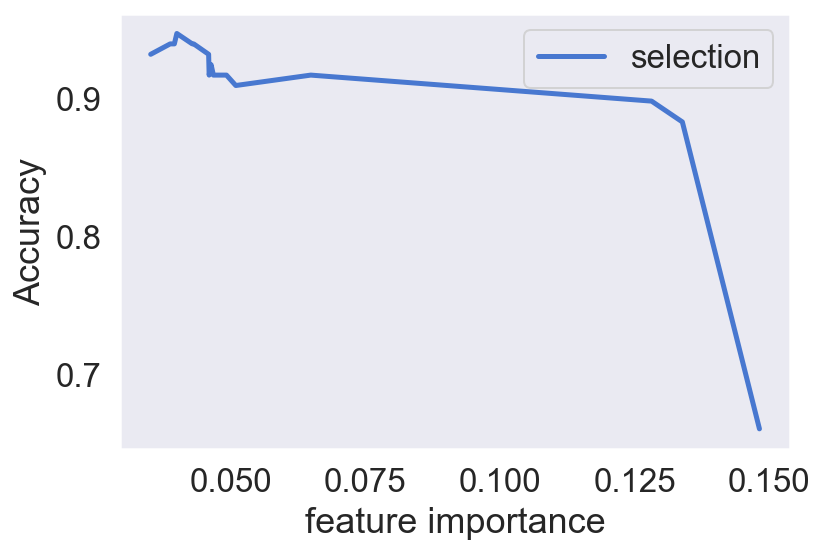

In [23]:
import matplotlib.pyplot as plt



plt.show()
plt.figure(figsize=(6,4), dpi=144)
plt.grid()
plt.xlabel("feature importance")
plt.ylabel("Accuracy")
plt.plot( thresholds,acc, label='selection')

plt.legend()

In [24]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import recall_score,accuracy_score

from sklearn.metrics import precision_score,f1_score
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle

yy = label_binarize(label, classes=[0, 1, 2])
n_classes = yy.shape[1]
y_pred = model.predict(Xtest)
Y_pred = label_binarize(y_pred, classes=[0, 1, 2])


Y_test=label_binarize(Ytest, classes=[0, 1, 2])


# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                       Y_pred[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], Y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    Y_pred.ravel())
average_precision["micro"] = average_precision_score(Y_test,Y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.88


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.88')

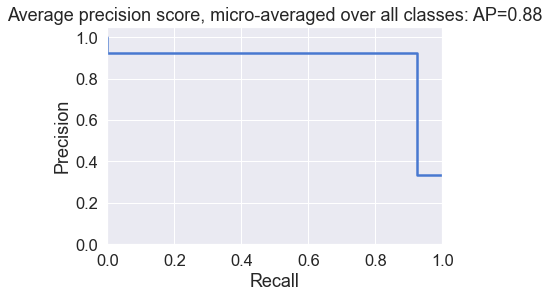

In [25]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

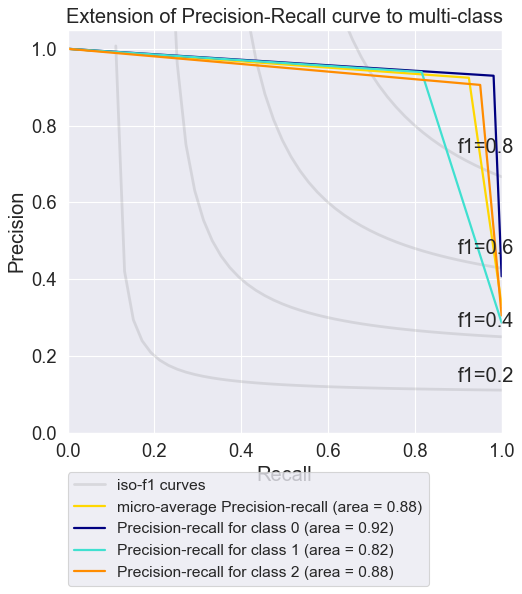

In [26]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7,8), dpi=80)
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

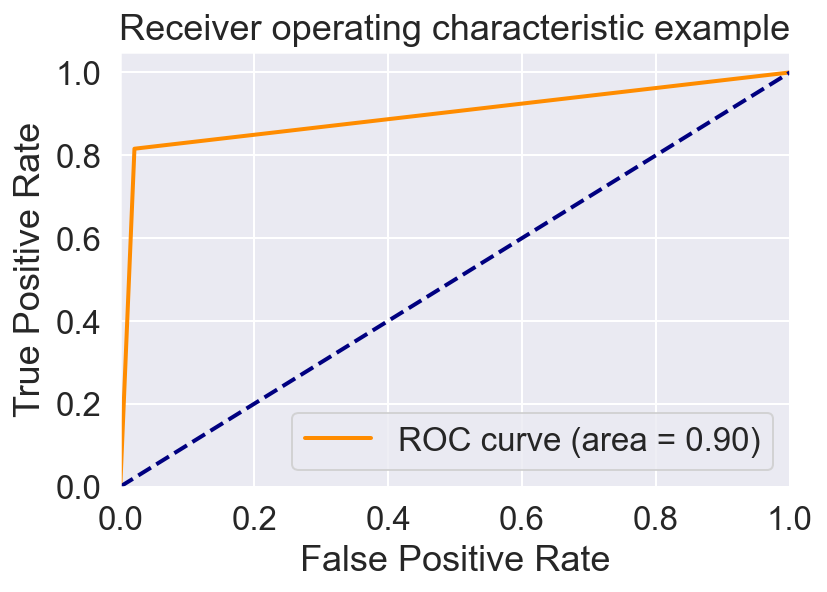

In [27]:




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(6,4), dpi=144)
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


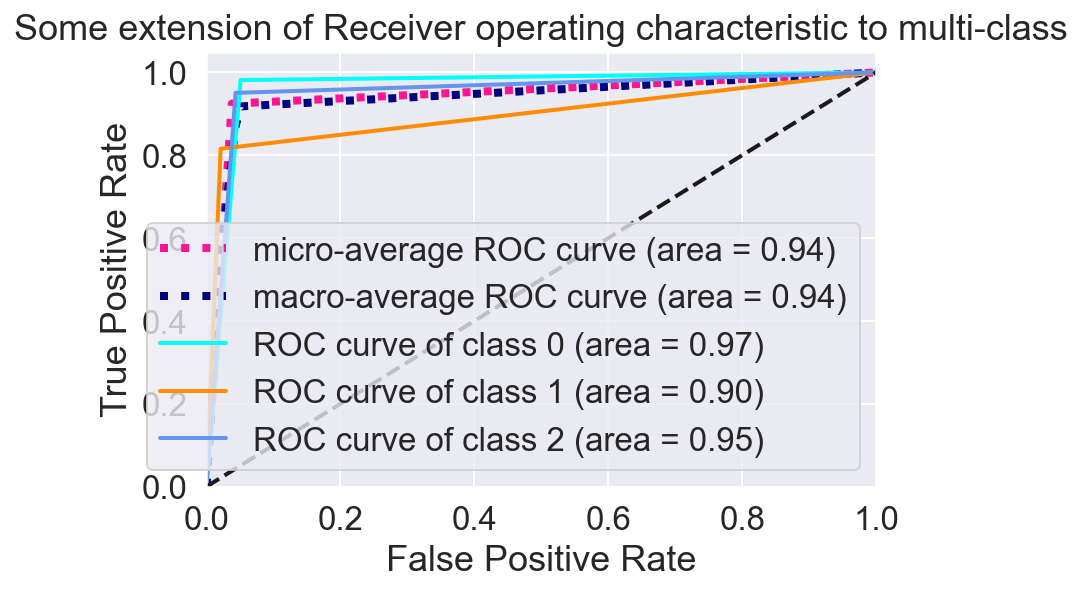

In [28]:
# Compute macro-average ROC curve and ROC area
yy = label_binarize(label, classes=[0, 1, 2])
classes = yy.shape[1]
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(6,4), dpi=144)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [29]:
print(Ytest)
a=np.count_nonzero(Ytest == 1)#Neg
b=np.count_nonzero(Ytest == 2)#Pos
c=np.count_nonzero(Ytest == 0)#Neu
print(a)
print(b)
print(c)

967     2.0
957     1.0
455     2.0
218     1.0
1123    1.0
       ... 
607     2.0
766     1.0
1049    1.0
1053    1.0
972     2.0
Name: Label, Length: 265, dtype: float64
76
81
108


In [30]:
#多分类：混淆矩阵

from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(Ytest,y_pred)
cfm_normalized = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]
print(cfm_normalized)
print(cfm)

[[0.98148148 0.01851852 0.        ]
 [0.07894737 0.81578947 0.10526316]
 [0.02469136 0.02469136 0.95061728]]
[[106   2   0]
 [  6  62   8]
 [  2   2  77]]


<AxesSubplot:>

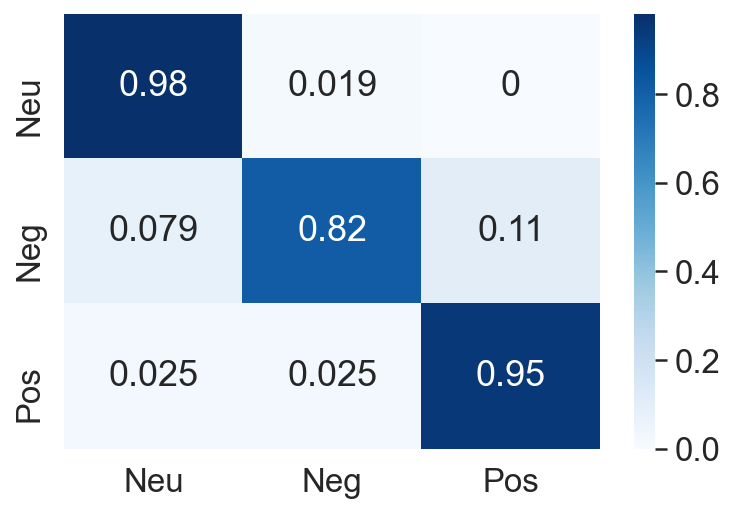

In [31]:
import seaborn as sns

labels=["Neu","Neg","Pos"]
plt.figure(figsize=(6,4), dpi=144)
sns.heatmap(cfm_normalized,annot=True,cmap='Blues',xticklabels=labels,yticklabels= labels)

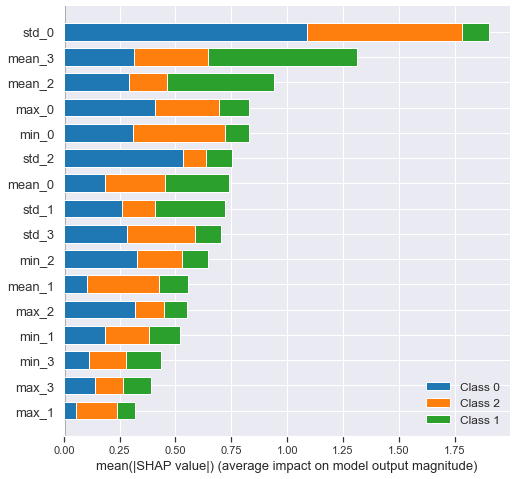

array([[-0.0598168 ,  0.1833974 ,  0.3253619 ,  2.184632  , -0.01836367,
         0.59072304, -0.18721248,  0.15461256,  0.07963914,  0.15588382,
         0.11374155,  0.06770512, -0.12132449, -0.00984504, -0.02806464,
        -0.17269017],
       [ 0.19358347, -0.0459589 , -1.384109  , -0.5524434 , -0.15728445,
        -0.06744909, -0.2865562 ,  0.01077136, -0.16746916,  0.08153111,
        -0.06635783, -0.22237304, -0.20075442, -0.00761235, -0.08999525,
        -0.170615  ]], dtype=float32)

In [32]:
import shap
import matplotlib.pyplot as pl


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xtrain)

shap.summary_plot(shap_values, Xtrain,color=pl.get_cmap("tab10"))
shap_values[1][:2,:]#表示前两个样本对于输出标签为1的shap值

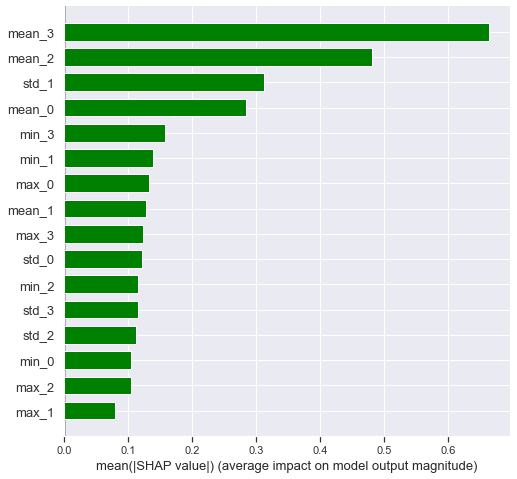

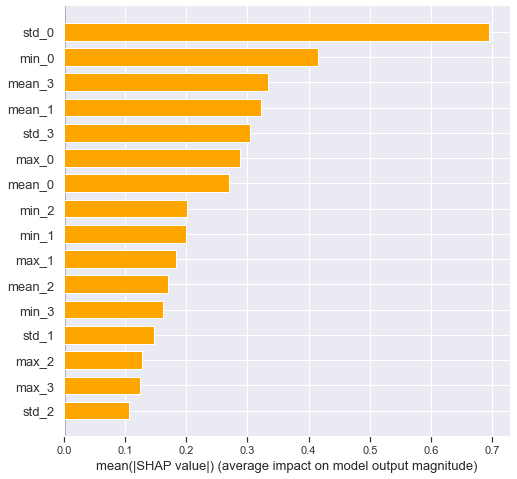

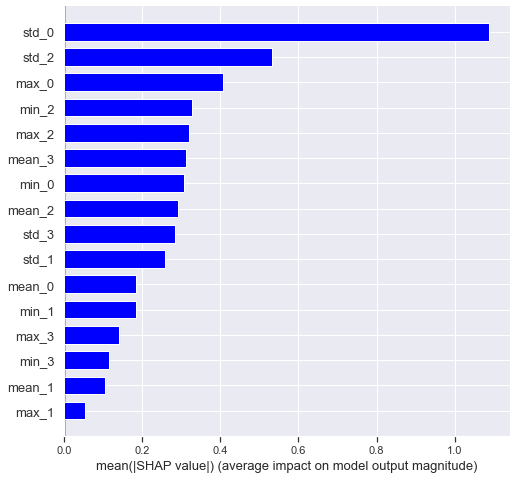

In [33]:
shap.summary_plot(shap_values[1],Xtest, plot_type="bar",color='green')
shap.summary_plot(shap_values[2],Xtest, plot_type="bar",color='orange')
shap.summary_plot(shap_values[0],Xtest, plot_type="bar",color='blue')

# ---------------------------分割线-----------------------------

# Embedded嵌入法

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [35]:
RFC_ = RFC(n_estimators=10,random_state=0)  # 随机森林实例化

In [36]:
x = data_.iloc[:,:-2]
y = data_.iloc[:,-1]
x.shape

NameError: name 'data_' is not defined

* 阈值为0.005

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.00870999).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
# 确定准确率最高threshold值


score2 = []
for i in np.linspace(0,0.00870999,20):
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00870999,20),score2)
plt.xticks(np.linspace(0,0.00870999,20))
plt.show()

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.003209).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_embedded,y,cv=5).mean()

* 阈值为0.001

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

# Wrapper包装法

In [ ]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=22,step=5).fit(x,y)  # 每迭代一次删除掉50个特征

In [ ]:
selector.support_.sum() #.support_：返回所有的特征的是否最后被选中的布尔矩阵

In [ ]:
selector.ranking_   #返回特征的按数次迭代中综合重要性的排名,越重要的特征排在前面

In [ ]:
x_wrapper = selector.transform(x)

In [ ]:
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

In [ ]:
# 绘制学习曲线
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()